In [1]:
import sys
sys.path.append("../SpikeCounter")
from skimage import io as skio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import filters, morphology, transform
from scipy import stats, signal, ndimage
import os
from spikecounter import utils
from spikecounter.ui import visualize
import colorcet as cc
from matplotlib import colors
plt.style.use("../bio_pubs_presentation.mplstyle")

In [2]:
rootdir = "/n/holyscratch01/cohen_lab/bjia/20220805_confocal_gcamp/"
figdir= "/n/cohen_lab/Lab/Papers/2022 First Heartbeat/Figures/v8"
filename = "E18-16"

In [3]:
img = skio.imread(os.path.join(rootdir, "%s.tif" % filename))

In [4]:
img.shape

(3398, 484, 512)

In [62]:
um2 = (0.3980*2)**2

In [33]:
processed = ndimage.median_filter(img, size=(1,5,5))
processed = transform.downscale_local_mean(processed, (1,2,2))
dF = processed - np.percentile(processed, 50, axis=0)

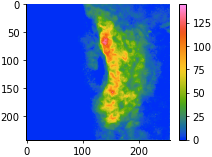

In [69]:
q = plt.imshow(dF.max(axis=0))
plt.colorbar(q)

In [227]:
max_value = np.percentile(dF, 99.9)

In [228]:
max_value

50.5

In [229]:
ratio = 0.45
area_trace = (dF > max_value*ratio).sum(axis=(1,2))*um2

(<Figure size 720x864 with 1 Axes>,
 <AxesSubplot:>,
 None)

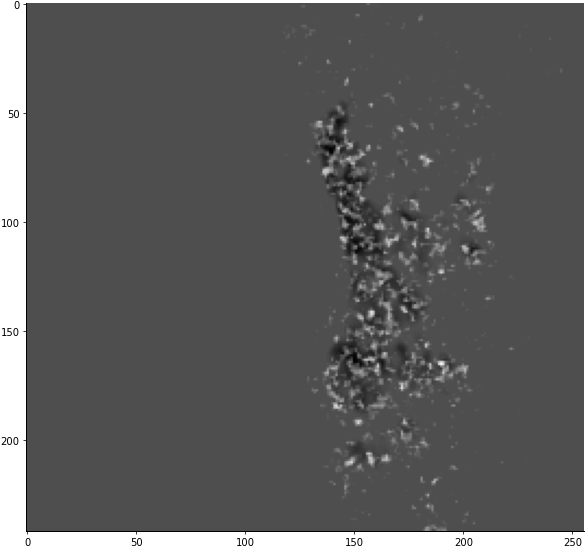

In [230]:
idx = 1000
visualize.display_roi_overlay(dF[idx], dF[idx] > max_value*ratio)

In [231]:
area_trace

array([0.      , 0.      , 0.633616, ..., 0.633616, 0.      , 1.267232])

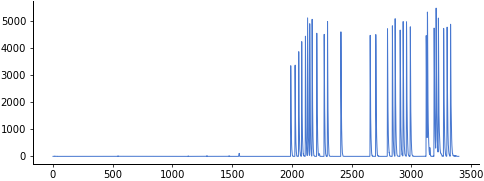

In [232]:
fig1, ax1 = plt.subplots(figsize=(8,3))
ax1.plot(area_trace)
# ax1.set_xlim(1000, 2000)
# ax1.set_ylim(-100, 500)

In [23]:
area_trace

array([21.701348, 20.117308, 20.909328, ..., 23.919004, 23.443792,
       24.394216])

Old data

In [206]:
old_files = ["20201111_E4_t1", "20201113_E1_t4", "20201113_E4_t1"]

In [121]:
area_traces = []

In [157]:
filename2 = "20201113_E4_t1"
img2 = skio.imread(os.path.join(rootdir, "%s.tif" % filename2))[:,0,:,:]


In [158]:
processed2 = ndimage.median_filter(img2, size=(1,3,3))
dF2 = processed2 - np.percentile(processed2, 50, axis=0)

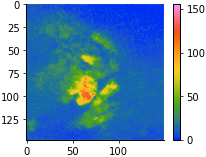

In [159]:
q = plt.imshow(dF2.max(axis=0))
plt.colorbar(q)

In [134]:
um22 = 0.6889
max_value = np.percentile(dF2, 99.9)
print(max_value)

73.0


Ratios
20201111_E4_t1: 0.15
20201113_E1_t4: 0.22
20201113_E4_t1: 0.12

In [212]:
ratio = 0.12
area_trace = (dF2 > max_value*ratio).sum(axis=(1,2))*um22

(<Figure size 720x864 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x2b0a4fbbb550>)

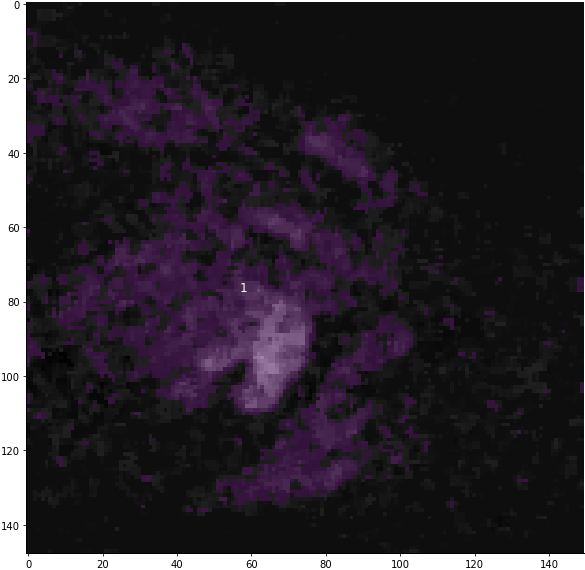

In [213]:
idx = 200
visualize.display_roi_overlay(dF2[idx], dF2[idx] > max_value*ratio)

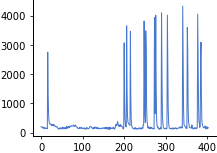

In [214]:
plt.plot(area_trace)

(-100.0, 500.0)

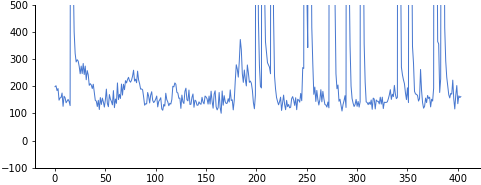

In [215]:
fig1, ax1 = plt.subplots(figsize=(8,3))
ax1.plot(area_trace)
# ax1.set_xlim(1000, 2000)
ax1.set_ylim(-100, 500)

In [216]:
df = pd.DataFrame(area_trace, columns=["area_um2"])
df.to_csv(os.path.join(rootdir, "%s_areas.csv" % filename2), index=False)

In [217]:
offsets = [127, 79, 201]
dt = 1.9

In [246]:
# cmatrix = np.zeros((3,2,3))
# cmatrix[:,1,0] = 1
# # cmatrix[:,0,1:3] = np.array([84,211,204])[:,None]/255
# cmatrix[:,0,1:3] = np.array([140,234,231])[:,None]/255
# cmatrix[:,1,1:3] = np.array([83,154,212])[:,None]/255

# cdict = {'red':   cmatrix[0].tolist(),
#          'green': cmatrix[1].tolist(),
#          'blue':  cmatrix[2].tolist()}

# newcmp = colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

In [268]:
cdict

{'red': [[0.0, 0.5490196078431373, 0.5490196078431373],
  [1.0, 0.3254901960784314, 0.3254901960784314]],
 'green': [[0.0, 0.9176470588235294, 0.9176470588235294],
  [1.0, 0.6039215686274509, 0.6039215686274509]],
 'blue': [[0.0, 0.9058823529411765, 0.9058823529411765],
  [1.0, 0.8313725490196079, 0.8313725490196079]]}

In [275]:
# colormap #54d3cc to #539ad4

cmatrix = np.zeros((3,5,3))
cmatrix[:,:,0] = np.arange(cmatrix.shape[1])/(cmatrix.shape[1]-1)
# cmatrix[:,0,1:3] = np.array([84,211,204])[:,None]/255
# cmatrix[:,0,1:3] = np.array([140,234,231])[:,None]/255

# cmatrix[:,1,1:3] = np.array([83,154,212])[:,None]/255

cmatrix[:,0,1:3] = np.array((15,94,156))[:,None]/255
cmatrix[:,1,1:3] = np.array((35,137,218))[:,None]/255
cmatrix[:,2,1:3] = np.array((28,163,236))[:,None]/255
cmatrix[:,3,1:3] = np.array((90,188,216))[:,None]/255
cmatrix[:,4,1:3] = np.array((116,204,244))[:,None]/255

# cmatrix[:,4,1:3] = np.array([179,205,224])[:,None]/255


cdict = {'red':   cmatrix[0].tolist(),
         'green': cmatrix[1].tolist(),
         'blue':  cmatrix[2].tolist()}

newcmp = colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)

In [5]:
ts_new = pd.read_csv(os.path.join(rootdir, "%s_plane_table.csv" % filename))["TimeS"]

In [6]:
y =ts_new - ts_new[1991]

In [7]:
y[1775]

-64.76300000000003

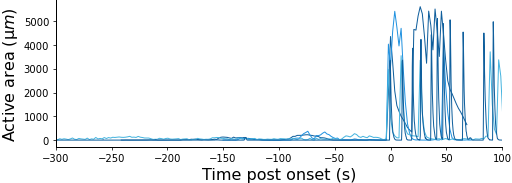

In [285]:
fig1, ax1 = plt.subplots(figsize=(8, 2.7))
for i, of in enumerate(old_files):
    df = pd.read_csv(os.path.join(rootdir, "%s_areas.csv" % of))
    ts = np.arange(df.shape[0])*dt
    ax1.plot(ts-ts[offsets[i]], df["area_um2"]-np.min(df["area_um2"]), alpha=1, color=newcmp(i/len(old_files)))
ts_new = pd.read_csv(os.path.join(rootdir, "%s_plane_table.csv" % filename))["TimeS"]
ax1.plot(ts_new-ts_new[1991], area_trace, color=newcmp(1))
ax1.set_xlim(-300, 100)
ax1.set_xlabel("Time post onset (s)")
ax1.set_ylabel(r"Active area ($\mathrm{\mu}$ m)")
plt.savefig(os.path.join(figdir, "Figure2", "POSTER_active_area_traces.svg"))

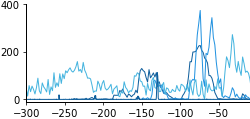

In [286]:
fig1, ax1 = plt.subplots(figsize=(4, 1.8))
for i, of in enumerate(old_files):
    df = pd.read_csv(os.path.join(rootdir, "%s_areas.csv" % of))
    ts = np.arange(df.shape[0])*dt
    ax1.plot(ts-ts[offsets[i]], df["area_um2"]-np.min(df["area_um2"]), alpha=1, color=newcmp(i/len(old_files)))
ts_new = pd.read_csv(os.path.join(rootdir, "%s_plane_table.csv" % filename))["TimeS"]
ax1.plot(ts_new-ts_new[1991], area_trace, color=newcmp(1))
ax1.set_xlim(-300, -10)
ax1.set_ylim(-10, 400)
plt.savefig(os.path.join(figdir, "Figure2", "POSTER_active_area_traces_inset.svg"))